## import

In [1]:
import tensorflow._api.v2.compat.v1 as tf
import numpy as np
tf.disable_v2_behavior()
from PIL import Image 
# print('Pillow Version:', PIL.__version__)
from numpy import asarray

import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


## initialization

pixel:
x1 | x2 | x3
---|---|---
x4 | y  | x5
x6 | x7 | x8 


In [2]:
# variables
features = 8
y = tf.placeholder(tf.float32)
x = tf.placeholder(tf.float32,[None,features])
w = tf.Variable(tf.zeros([features,1]))
b = tf.Variable(tf.zeros(1))

# functions
alfa = 0.000004
pred = tf.matmul(x, w) + b 
loss = tf.reduce_mean(tf.pow(pred - y, 2))+ 0.1*tf.reduce_sum(tf.abs(w)) # + lasso regularization
update = tf.train.GradientDescentOptimizer(alfa).minimize(loss)

## data function

In [3]:
def get_XY_from_image(photo_name:str,color:int,jumps:int=100,show:bool=False):
    data = asarray(Image.open(photo_name))
    color_arr = data[:,:,color]
    image_color_arr = Image.fromarray(color_arr)
    if show: image_color_arr.show()
    data_x = []
    data_y = []
    print(f"pic size: {len(color_arr)}x{len(color_arr[0])} name: {photo_name}")
    for i in range(1,len(color_arr)-1,jumps):
        for j in range(1,len(color_arr[0])-1):
            temp_y = [color_arr[i][j]]
            temp_x = [color_arr[i-1][j-1],color_arr[i-1][j],color_arr[i][j-1],color_arr[i+1][j],color_arr[i][j+1],color_arr[i+1][j+1],color_arr[i-1][j+1],color_arr[i+1][j-1]]
            data_y.append(temp_y)
            data_x.append(temp_x)
    return (data_x,data_y)

def load_pic_data(pics_array,color:int,jumps:int=100,show:bool=False):
    data_x , data_y = get_XY_from_image(pics_array[0],color,jumps,show)
    for i in pics_array[1:]:
        data_tmp_x , data_tmp_y = get_XY_from_image(i,color,jumps,show)
        data_x = np.append(data_x,data_tmp_x,axis=0)
        data_y = np.append(data_y,data_tmp_y,axis=0)
    data_x = np.array(data_x)
    data_y = np.array(data_y)
    return data_x,data_y

## get data

In [4]:
data_x , data_y = load_pic_data(
    ["data/cat_test.jpg","data/balloon.jpg","data/cat.jpg","data/city.jpg","data/city_night.jpg","data/city_color.jpg",
    "data/flower.jpg","data/moon.jpg","data/telescope.jpg"],
    color=0,jumps=100)
data_t_x , data_t_y = load_pic_data(["data/park.jpg"],color=1,jumps=100)


pic size: 681x1024 name: data/cat_test.jpg
pic size: 480x720 name: data/balloon.jpg
pic size: 576x1024 name: data/cat.jpg
pic size: 664x1080 name: data/city.jpg
pic size: 1282x2278 name: data/city_night.jpg
pic size: 539x959 name: data/city_color.jpg
pic size: 600x800 name: data/flower.jpg
pic size: 708x1280 name: data/moon.jpg
pic size: 464x696 name: data/telescope.jpg
pic size: 588x830 name: data/park.jpg


## running the sim

In [5]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
show = 10
loss_in_time = []
w_arr = []
test_over_time = []
for i in range(0,10000):
       sess.run(update, feed_dict = {x:data_x, y:data_y})
       if(i%show==0 and i>100):
              tmp = sess.run(loss,feed_dict={x:data_x,y:data_y})
              loss_in_time.append(tmp)
              w_arr.append(sess.run(w))
              if(i%(show*50)==0):
                     print(f"i = {i}, loss = {tmp}")
              
              test_over_time.append(sess.run(loss,feed_dict={x:data_t_x,y:data_t_y}))
              #  w = {sess.run(w)}, b = {sess.run(b)},


i = 500, loss = 72.51049041748047
i = 1000, loss = 56.01280975341797
i = 1500, loss = 46.32130432128906
i = 2000, loss = 40.59733200073242
i = 2500, loss = 37.21431350708008
i = 3000, loss = 35.213775634765625
i = 3500, loss = 34.03020477294922
i = 4000, loss = 33.329620361328125
i = 4500, loss = 32.914695739746094
i = 5000, loss = 32.668792724609375
i = 5500, loss = 32.522953033447266
i = 6000, loss = 32.43635559082031
i = 6500, loss = 32.3848762512207
i = 7000, loss = 32.35423278808594
i = 7500, loss = 32.33595657348633
i = 8000, loss = 32.32501983642578
i = 8500, loss = 32.318458557128906
i = 9000, loss = 32.314517974853516
i = 9500, loss = 32.3121337890625


## printing and testing

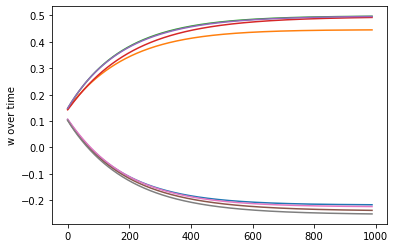

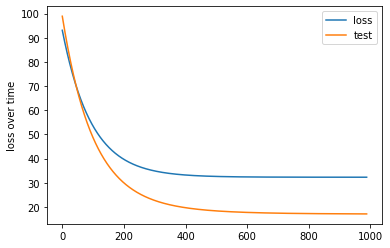

In [6]:
d = np.array(np.array(w_arr).transpose()[0]).transpose()
plt.plot(d)
plt.ylabel('w over time')
plt.show()

plt.plot(loss_in_time,label ="loss")
plt.plot(test_over_time , label ="test")
plt.legend()
plt.ylabel('loss over time')
plt.show()

# data_x , data_y = get_XY_from_image("cat.jpg",0)

# print(f"loss test: {sess.run(loss,feed_dict={x:data_x,y:data_y})}")

# print(f"w = {sess.run(w)}")
# print(f"b = {sess.run(b)} ")
# print(f"predict = {np.matmul([5,15,10],sess.run(w))+sess.run(b)}")

## show the calc image

In [12]:

red, r_tmp = load_pic_data(["data/park.jpg"],0,jumps=1)
green, g_tmp = load_pic_data(["data/park.jpg"],1,jumps=1)
blue, b_tmp = load_pic_data(["data/park.jpg"],2,jumps=1)
size_x = 588
size_y = 830
red_calculated_mat = np.reshape(np.matmul(red,sess.run(w))+sess.run(b),(size_x-2,size_y-2))
green_calculated_mat = np.reshape(np.matmul(green,sess.run(w))+sess.run(b),(size_x-2,size_y-2))
blue_calculated_mat = np.reshape(np.matmul(blue,sess.run(w))+sess.run(b),(size_x-2,size_y-2))

arr = np.zeros((size_x-2,size_y-2,3))
arr[:,:,0] = np.reshape(r_tmp,(size_x-2,size_y-2))
arr[:,:,1] = np.reshape(g_tmp,(size_x-2,size_y-2))
arr[:,:,2] = np.reshape(b_tmp,(size_x-2,size_y-2))

arr_calc = np.zeros((size_x-2,size_y-2,3))
arr_calc[:,:,0] = red_calculated_mat
arr_calc[:,:,1] = green_calculated_mat
arr_calc[:,:,2] = blue_calculated_mat

data_RGB = np.concatenate((arr.astype('uint8'),arr_calc.astype('uint8')), axis=1)

img = Image.fromarray(data_RGB,mode="RGB")
img.show(title="calculated")
print(np.max(np.matmul(red,sess.run(w))+sess.run(b)))
print(np.max(np.matmul(green,sess.run(w))+sess.run(b)))
print(np.max(np.matmul(blue,sess.run(w))+sess.run(b)))

pic size: 588x830 name: data/park.jpg
pic size: 588x830 name: data/park.jpg
pic size: 588x830 name: data/park.jpg
271.424
261.80777
273.68243
